# Pandas 快捷方便处理日期数据
* 将多种日期格式转换成统一的格式对象
    * pd.to_datetime 能将字符串、列表、series变成日期形式
    * Timestamp 表示日期的对象形式
    * DatetimeIndex 表示日期的对象列表形式
    * DatetimeIndex 是Timestamp的列表形式
    * pd.to_datetime 对单个字符串处理会得到Timestamp
    * pd.to_datetime 对日期列表处理会得到DatetimeIndex
* 与时间相关的概念
   * 日期时间：具有时区支持的特定日期和时间
   * 时间增量：绝对持续时间
   * 时间跨度：由时间点及其关联的频率定义的时间跨度
   * 日期偏移量：尊重日历算术的相对持续时间

## 导入模块

In [25]:
import pandas as pd
import requests_html
from requests_html import HTMLSession
import datetime
%matplotlib inline

## 爬取 pandas Time series 所提供的表格
（如果不想在GitHub整个下载就用爬取的放方式）

### 用read_html抓取

In [26]:
url = "https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv"
session = HTMLSession()
r = session.get( url )

# read_html()可快速抓取网页上的表格，[0]代表网页上的第一个表格
df_空气指数 = pd.read_html(url)[0] 
df_空气指数

,Unnamed: 0,city,country,date.utc,location,parameter,value,unit
0,NaN,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,NaN,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,NaN,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,NaN,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,NaN,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...,...
2063,NaN,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,NaN,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,NaN,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,NaN,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


### 用 requests+lxml 库爬取

In [4]:
import requests
import lxml
import pandas as pd
from lxml import etree
res = requests.get('https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv')
res_elements = etree.HTML(res.text)
table = res_elements.xpath('/html/body/div[4]/div/main/div[2]/div/div[3]/div[2]/div[2]/table')
table = etree.tostring(table[0], encoding='utf-8').decode()

df_空气指数 = pd.read_html(table, encoding='utf-8', header=0)[0]
results = list(df_空气指数.T.to_dict().values())  # 转换成列表嵌套字典的格式
df_空气指数

In [27]:
# 将行标签重命名
df_空气指数 = df_空气指数.rename(columns={"date.utc": "datetime"})

In [28]:
# 查看此时的datetime类型
type(df_空气指数.datetime[0])

str

## 字符串和datetime的转换

In [29]:
# 日期的类型变为了datetime
df_空气指数["datetime"] = pd.to_datetime(df_空气指数["datetime"])
df_空气指数["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [30]:
# 查看最大的一天和最小的一天
# to_datetime 对单个字符串处理会得到Timestamp

df_空气指数["datetime"].max(),df_空气指数["datetime"].min()

(Timestamp('2019-06-21 00:00:00+0000', tz='UTC'),
 Timestamp('2019-05-07 01:00:00+0000', tz='UTC'))

In [31]:
# 计算这个表格计算了多少天
# 时间增量

df_空气指数["datetime"].max() - df_空气指数["datetime"].min()

Timedelta('44 days 23:00:00')

## 在DataFrame仅包含测量周/月份/年/季度

In [32]:
# 周

df_空气指数["weekofyear"] = df_空气指数["datetime"].dt.weekofyear
df_空气指数.head()

,Unnamed: 0,city,country,datetime,location,parameter,value,unit,weekofyear
0,NaN,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,25
1,NaN,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,25
2,NaN,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,25
3,NaN,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,25
4,NaN,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,25


In [33]:
# 月份

df_空气指数["month"] = df_空气指数["datetime"].dt.month
df_空气指数.head()

,Unnamed: 0,city,country,datetime,location,parameter,value,unit,weekofyear,month
0,NaN,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,25,6
1,NaN,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,25,6
2,NaN,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,25,6
3,NaN,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,25,6
4,NaN,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,25,6


In [34]:
# 年

df_空气指数["year"] = df_空气指数["datetime"].dt.year
df_空气指数.head()

,Unnamed: 0,city,country,datetime,location,parameter,value,unit,weekofyear,month,year
0,NaN,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,25,6,2019
1,NaN,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,25,6,2019
2,NaN,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,25,6,2019
3,NaN,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,25,6,2019
4,NaN,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,25,6,2019


In [35]:
# 季度

df_空气指数["quarter"] = df_空气指数["datetime"].dt.quarter
df_空气指数.head()

,Unnamed: 0,city,country,datetime,location,parameter,value,unit,weekofyear,month,year,quarter
0,NaN,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,25,6,2019,2
1,NaN,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,25,6,2019,2
2,NaN,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,25,6,2019,2
3,NaN,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,25,6,2019,2
4,NaN,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,25,6,2019,2


## 测量一周中每一天同一位置的 NO2平均值浓度是多少？

In [41]:
df_空气指数.groupby([df_空气指数['datetime'].dt.weekday,'location'])['value'].mean()

# 将44天分成7个组，计算每周的平均值

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

## 可视化：一天中NO2浓度的变化

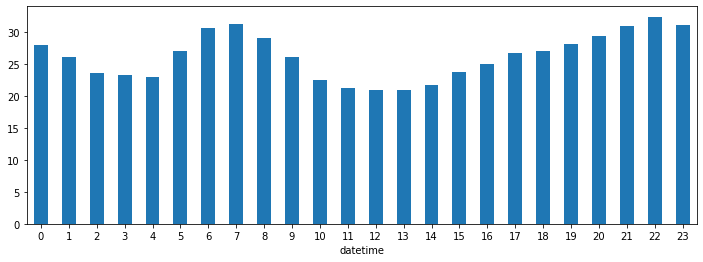

In [44]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 4))
df_空气指数.groupby(df_空气指数["datetime"].dt.hour)["value"].mean().plot(kind='bar',rot=0,ax=axs)

# 44天里有44个0时，那么就把这44个0时加起来取平均值，最后得出结果，但是会有空缺值

## 数据重塑

In [46]:
no_2 = df_空气指数.pivot(index="datetime", columns="location", values="value")
no_2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [50]:
no_2.index.year,no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

## 计算某个时间段的变化

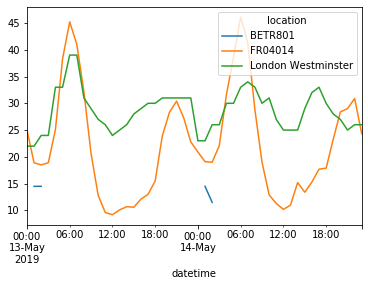

In [55]:
no_2["2019-05-13":"2019-05-14"].plot();

## 时间采样
* 将时间序列重新采样到另一个频率
* 会产生偏移值
* resample():改变数据的时间频率，例如把小时数据变成分钟级别，将天数变成月份
    * 类似于groupby()，但是比groupby()强大
    * 可以改变原始时间的起始点，给它一个偏移值，然后按照某一个频率去计算时间
    * 兼顾了groupby()+agg(),有偏移值

In [58]:
monthly_max = no_2.resample("W-MON").mean()   # 这里 monday 就是一个偏移值
# W 代表每一周，可翻倍叠加，如3W，这时表示每三周
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-13 00:00:00+00:00,22.535714,26.554878,30.753165
2019-05-20 00:00:00+00:00,23.980769,27.114970,31.035928
2019-05-27 00:00:00+00:00,37.642857,32.688485,28.718563
2019-06-03 00:00:00+00:00,20.200000,25.180000,20.850299
2019-06-10 00:00:00+00:00,14.500000,25.224503,17.699387
2019-06-17 00:00:00+00:00,34.178571,28.922424,19.074830
2019-06-24 00:00:00+00:00,NaN,31.070370,NaN


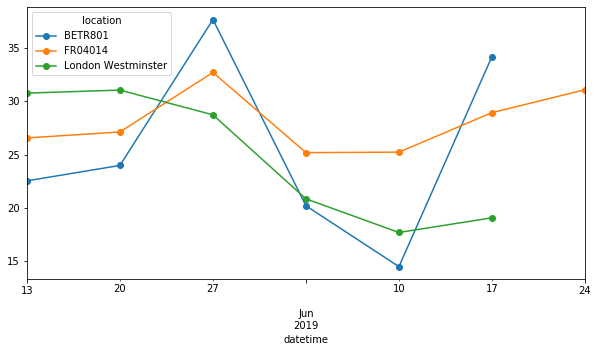

In [59]:
no_2.resample("W-MON").mean().plot(style="-o", figsize=(10, 5));

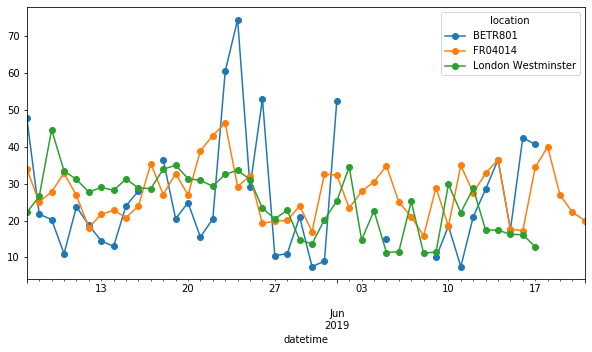

In [60]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

# 独角兽